Import required packages

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

Create simple dataframe: one for nodes and one for edges

In [2]:
#Create DF for links / edges
edges = pd.DataFrame({'from': ['A', 'A', 'A', '1', '2', '3', '1', 'Center', 'Center', 
                                       'Center', 'Center', 'Center', 'Center', 'Center'], 
                              'to': ['B', 'C', 'D', 'C', 'C', 'A', '3', '1', '3', '2', 'A', 'B', 
                                     'C', 'D']})

# Create DF for node characteristics
nodes = pd.DataFrame({'ID':['A', 'B', 'C', 'D', '1', '2', '3', 'Center'], 
                      'type':['Letter','Letter', 'Letter', 'Letter', 'Number', 'Number', 
                              'Number', 'Center']})

Create a simple graph object

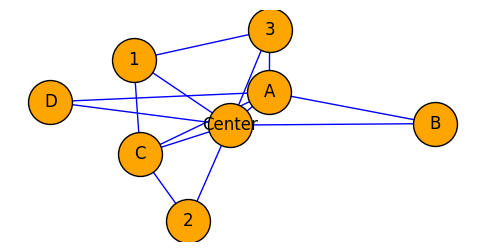

In [6]:
# Create graph object
fig, ax = plt.subplots(figsize=(6,3))
G = nx.from_pandas_edgelist(edges, 'from', 'to', create_using=nx.Graph())
nx.draw(G, with_labels=True, node_color='orange', node_size=1000, width=1, 
    edge_color='blue', edgecolors='black') #Note the difference between edge_color and edgecolors

Get a little fancy and size/color by type of node. First create categories for numbered and lettered nodes (just as an example)

In [7]:
# Step 1: Make types into categories
nodes= nodes.set_index('ID')
nodes=nodes.reindex(G.nodes())
nodes['type']=pd.Categorical(nodes['type'])
nodes['type'].cat.codes

ID
A         1
B         1
C         1
D         1
1         2
2         2
3         2
Center    0
dtype: int8

Next: create a small style dictionary that can be applied depending on whether a node is a letter or number.

In [8]:
pretty_graph = {
    "with_labels" : True, 
    "node_color" : nodes['type'].cat.codes, 
    "cmap" : mpl.colors.ListedColormap(['dodgerblue', 'lightgray', 'darkorange']), 
    "node_size" : [1000 if entry != 'Letter' else 500 for entry in nodes.type], 
    "edgecolors" : 'gray'
}

Finally, create the network applying the style dictionary above.

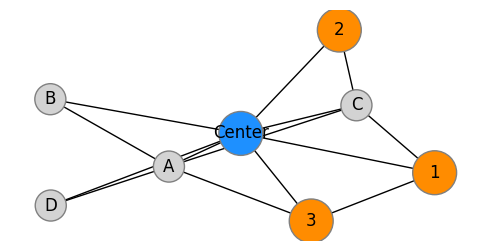

In [9]:
fig, ax = plt.subplots(figsize=(6,3))
nx.draw(G, **pretty_graph)

Let's create a collection of different graph layouts

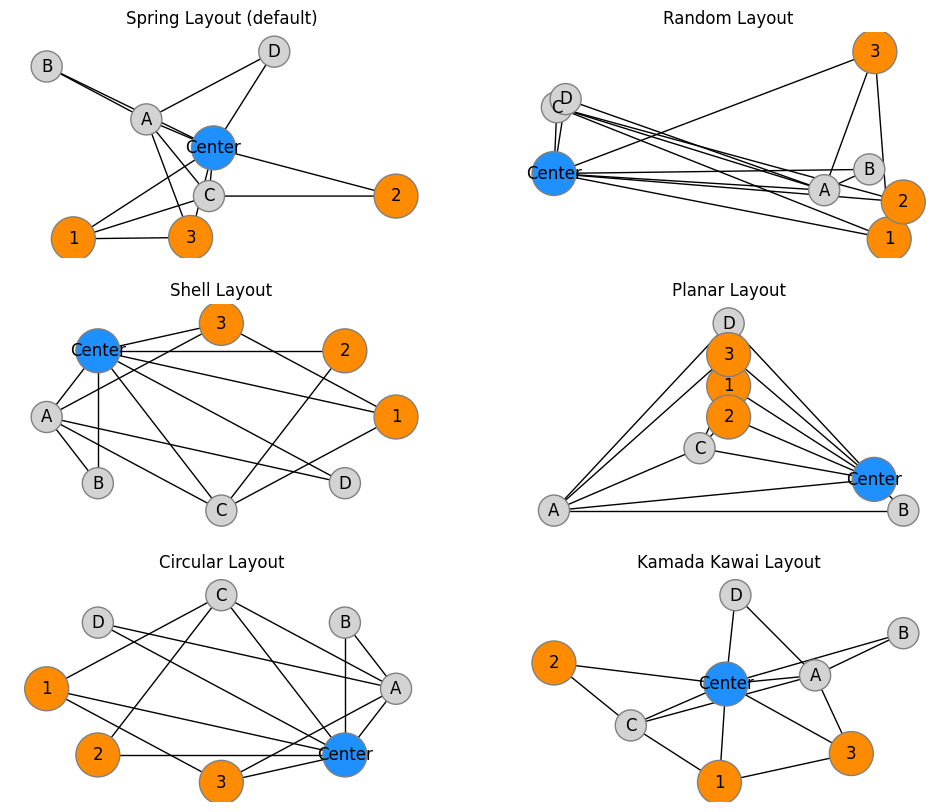

In [10]:
f = plt.figure(figsize=(12,10))
f.tight_layout()

# Subplot 1
plt.subplot(3, 2, 1, title = 'Spring Layout (default)')
nx.draw(G, **pretty_graph)

# Subplot 2
plt.subplot(3, 2, 2, title = 'Random Layout')
nx.draw_random(G, **pretty_graph) 

# Subplot 3
plt.subplot(3, 2, 3, title = 'Shell Layout')
nx.draw_shell(G, **pretty_graph)

# Subplot 4
plt.subplot(3, 2, 4, title = 'Planar Layout')
nx.draw_planar(G, **pretty_graph)

# Subplot 5
plt.subplot(3, 2, 5, title = 'Circular Layout')
nx.draw_circular(G, **pretty_graph)

# Subplot 6
plt.subplot(3, 2, 6, title = 'Kamada Kawai Layout')
nx.draw_kamada_kawai(G, **pretty_graph)  #Note: this layout requires that scipy be installed 